# Install

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# %pip install git+https://github.com/friedrichknuth/gtsa.git

In [2]:
! pip install tools

  Using cached tools-0.1.9-py3-none-any.whl
  Using cached pytils-0.4.1-py3-none-any.whl


In [3]:
# ! pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [67]:
# !pip install -q condacolab

In [4]:
conda install mamba -n base -c conda-forge

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /srv/conda

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.1.4              |       hd590300_0         2.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following packages will be UPDATED:

  openssl                                  3.1.3-hd590300_0 --> 3.1.4-hd590300_0 



                                                                                
Preparing transaction: done


In [1]:
! git clone https://github.com/friedrichknuth/gtsa.git

fatal: destination path 'gtsa' already exists and is not an empty directory.


In [7]:
! pwd

/home/jovyan/geosmart_hackweek/space_time


In [ ]:
# takes about 4 min, need to rerun everytime restart
%cd ./gtsa
! mamba env create -f environment.yml
! conda activate gtsa
! pip install -e .

# Import data

In [2]:
import xarray as xr
import tools
import pandas as pd
import gtsa

In [3]:
baker_url = 's3://petrichor/geosmart/baker.zarr/'
scg_url = 's3://petrichor/geosmart/scg.zarr/'

baker_ds = xr.open_dataset(baker_url, chunks='auto', engine='zarr', storage_options={"anon": True}, decode_times=False)
scg_ds = xr.open_dataset(scg_url, chunks='auto', engine='zarr', storage_options={"anon": True}, decode_times=False)

units, reference_date = baker_ds.time.attrs['units'].split('since')
baker_ds['time'] = pd.date_range(start=reference_date, periods=baker_ds.sizes['time'], freq='MS')

In [5]:
baker_ds.chunk("auto", balance=True)['band1']

<xarray.DataArray 'band1' (time: 55, y: 12089, x: 11383)>
dask.array<open_dataset-band1, shape=(55, 12089, 11383), dtype=float32, chunksize=(55, 712, 670), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1947-10-01 1947-11-01 ... 1952-04-01
  * x        (x) float64 5.809e+05 5.809e+05 5.809e+05 ... 5.923e+05 5.923e+05
  * y        (y) float64 5.409e+06 5.409e+06 5.409e+06 ... 5.397e+06 5.397e+06
Attributes:
    AREA_OR_POINT:  Area
    grid_mapping:   spatial_ref

In [17]:
print(baker_ds)

<xarray.Dataset>
Dimensions:      (time: 55, y: 12089, x: 11383)
Coordinates:
  * time         (time) datetime64[ns] 1947-10-01 1947-11-01 ... 1952-04-01
  * x            (x) float64 5.809e+05 5.809e+05 ... 5.923e+05 5.923e+05
  * y            (y) float64 5.409e+06 5.409e+06 ... 5.397e+06 5.397e+06
Data variables:
    band1        (time, y, x) float32 dask.array<chunksize=(55, 712, 670), meta=np.ndarray>
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area
    add_offset:     0.0
    crs:            PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS...
    scale_factor:   1.0


In [18]:
print(scg_ds)

<xarray.Dataset>
Dimensions:      (time: 71, y: 2455, x: 2119)
Coordinates:
  * time         (time) int64 0 3326 4430 5841 6991 ... 22520 22615 22761 23011
  * x            (x) float64 6.419e+05 6.419e+05 ... 6.461e+05 6.461e+05
  * y            (y) float64 5.36e+06 5.36e+06 5.36e+06 ... 5.356e+06 5.356e+06
Data variables:
    band1        (time, y, x) float32 dask.array<chunksize=(71, 614, 530), meta=np.ndarray>
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:      Area
    TIFFTAG_ARTIST:     U.S. Geological Survey Benchmark Glacier Program
    TIFFTAG_COPYRIGHT:  Public Domain
    add_offset:         0.0
    crs:                PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM[...
    scale_factor:       1.0


## Downscale or subset data set

In [19]:
# small_baker_ds = baker_ds
# small_baker_ds=small_baker_ds.coarsen(x=150,y=150,time=5,boundary='trim').mean()

In [4]:
small_baker_ds = gtsa.geospatial.extract_dataset_center_window(baker_ds, size = 100)

Dataset center: 586638.4387119232, 5403404.566348841
Test column size: 100.0 by 100.0 in spatial coordinate units.
No CRS defined.
Using xarray slicing to select data along spatial coordinate axes.


/home/jovyan/geosmart_hackweek/space_time/gtsa/gtsa/geospatial.py:78: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  xmode = np.abs(scipy.stats.mode(ds["y"].diff("y"))[0])
/home/jovyan/geosmart_hackweek/space_time/gtsa/gtsa/geospatial.py:79: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to

In [4]:
print(small_baker_ds)

<xarray.Dataset>
Dimensions:      (time: 55, y: 101, x: 101)
Coordinates:
  * time         (time) datetime64[ns] 1947-10-01 1947-11-01 ... 1952-04-01
  * x            (x) float64 5.866e+05 5.866e+05 ... 5.867e+05 5.867e+05
  * y            (y) float64 5.403e+06 5.403e+06 ... 5.403e+06 5.403e+06
Data variables:
    band1        (time, y, x) float32 dask.array<chunksize=(55, 101, 101), meta=np.ndarray>
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area
    add_offset:     0.0
    crs:            PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS...
    scale_factor:   1.0


# Reproduce temporal GP in gsta

## Start Dask dashboard

In [5]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:36319")
client

<Client: 'tcp://127.0.0.1:36319' processes=10 threads=40, memory=310.91 GiB>

## Generate time to predict

In [5]:
import numpy as np

# create a time series to make predictions on as decimal year floats
# It is the same year just in a float data type??
start = small_baker_ds['time'].dt.strftime('%Y-%m-%d').values[0]
end = small_baker_ds['time'].dt.strftime('%Y-%m-%d').values[-1]
prediction_time_series = gtsa.temporal.create_prediction_timeseries(start_date = start,
                                                                    end_date = end,
                                                                    dt ='Y')

# prepare time values as decimal year floats
times = [pd.to_datetime(j) for j in small_baker_ds['band1'].time.values]
decyear_times = [gtsa.utils.date_time_to_decyear(i) for i in times] 
decyear_times = np.array(decyear_times)

small_baker_ds_train = small_baker_ds
small_baker_ds_train['time'] = decyear_times

In [9]:
small_baker_ds

<xarray.Dataset>
Dimensions:      (time: 55, y: 101, x: 101)
Coordinates:
  * time         (time) float64 1.948e+03 1.948e+03 ... 1.952e+03 1.952e+03
  * x            (x) float64 5.866e+05 5.866e+05 ... 5.867e+05 5.867e+05
  * y            (y) float64 5.403e+06 5.403e+06 ... 5.403e+06 5.403e+06
Data variables:
    band1        (time, y, x) float32 dask.array<chunksize=(55, 101, 101), meta=np.ndarray>
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area
    add_offset:     0.0
    crs:            PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS...
    scale_factor:   1.0

In [10]:
small_baker_ds_train

<xarray.Dataset>
Dimensions:      (time: 55, y: 101, x: 101)
Coordinates:
  * time         (time) float64 1.948e+03 1.948e+03 ... 1.952e+03 1.952e+03
  * x            (x) float64 5.866e+05 5.866e+05 ... 5.867e+05 5.867e+05
  * y            (y) float64 5.403e+06 5.403e+06 ... 5.403e+06 5.403e+06
Data variables:
    band1        (time, y, x) float32 dask.array<chunksize=(55, 101, 101), meta=np.ndarray>
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area
    add_offset:     0.0
    crs:            PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS...
    scale_factor:   1.0

In [14]:
small_baker_ds_train.mean().compute()

<xarray.Dataset>
Dimensions:      ()
Data variables:
    band1        float32 3.24e+03
    spatial_ref  float64 0.0

## Linear Reg

In [55]:
def custom_linreg(x,y, threshold = 2):
    mask = np.isfinite(y) # create mask for np.nan values
    if len(y[mask]) < threshold: # return np.nan if less than threshold
        return np.nan
    return np.polyfit(x[mask], y[mask], 1)[0]

In [56]:
print(small_baker_ds_train)

<xarray.Dataset>
Dimensions:      (time: 55, y: 101, x: 101)
Coordinates:
  * time         (time) float64 1.948e+03 1.948e+03 ... 1.952e+03 1.952e+03
  * x            (x) float64 5.866e+05 5.866e+05 ... 5.867e+05 5.867e+05
  * y            (y) float64 5.403e+06 5.403e+06 ... 5.403e+06 5.403e+06
Data variables:
    band1        (time, y, x) float32 dask.array<chunksize=(55, 101, 101), meta=np.ndarray>
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area
    add_offset:     0.0
    crs:            PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS...
    scale_factor:   1.0


In [57]:
result = xr.apply_ufunc(
        custom_linreg, decyear_times , small_baker_ds_train['band1'],
        input_core_dims=[['time'], ['time']],
        vectorize=True, 
        dask='parallelized',
        output_dtypes=[float],
        )

In [58]:
custom_slope = result.compute()

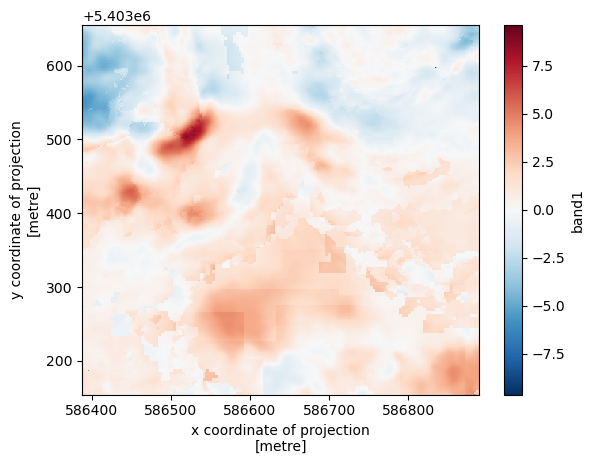

In [33]:
custom_slope.plot()

## Temporal GP

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (
    RBF,
    ConstantKernel,
    ExpSineSquared,
    PairwiseKernel,
    RationalQuadratic,
    WhiteKernel,
    Matern,
)

In [7]:
k1 = 30.0 * Matern(length_scale=10.0, nu=1.5)
k2 = ConstantKernel(30) * ExpSineSquared(length_scale=1, periodicity=30)
k3 = ConstantKernel(30) * ExpSineSquared(length_scale=1, periodicity=1)

kernel = k1+k2+k3

In [7]:
prediction_time_series

array([1947.99657769, 1948.99726776, 1949.99657769, 1950.99657769,
       1951.99657769])

In [21]:
small_baker_ds['band1'].time.values

array([1947.74743326, 1947.83230664, 1947.91444216, 1948.        ,
       1948.08469945, 1948.16393443, 1948.24863388, 1948.33060109,
       1948.41530055, 1948.49726776, 1948.58196721, 1948.66666667,
       1948.74863388, 1948.83333333, 1948.91530055, 1949.        ,
       1949.08487337, 1949.1615332 , 1949.24640657, 1949.32854209,
       1949.41341547, 1949.49555099, 1949.58042437, 1949.66529774,
       1949.74743326, 1949.83230664, 1949.91444216, 1950.        ,
       1950.08487337, 1950.1615332 , 1950.24640657, 1950.32854209,
       1950.41341547, 1950.49555099, 1950.58042437, 1950.66529774,
       1950.74743326, 1950.83230664, 1950.91444216, 1951.        ,
       1951.08487337, 1951.1615332 , 1951.24640657, 1951.32854209,
       1951.41341547, 1951.49555099, 1951.58042437, 1951.66529774,
       1951.74743326, 1951.83230664, 1951.91444216, 1952.        ,
       1952.08469945, 1952.16393443, 1952.24863388])

In [54]:
ds_result = gtsa.temporal.dask_apply_GPR(small_baker_ds_train['band1'],
                                         'time', 
                                         kwargs={'times':small_baker_ds['band1'].time.values,
                                                 'kernel': kernel,
                                                 'prediction_time_series' : prediction_time_series}
                                        ).compute()

dask GPR 
(101, 101, 55)


SystemExit: 

/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [53]:
gtsa.temporal.dask_GPR(small_baker_ds_train['band1'],times=small_baker_ds['band1'].time.values,
                       prediction_time_series=prediction_time_series)

dask GPR 
(55, 101, 101)


SystemExit: 

/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [52]:
print((small_baker_ds_train['band1'].shape))

(55, 101, 101)


In [ ]:
def dask_GPR(
    DataArray,
    times=None,
    kernel=None,
    prediction_time_series=None,
    alpha=2,
    count_thresh=3,
    time_delta_min=None,
):
    results = xr.apply_ufunc(
        dask_GPR,
        DataArray,
        kwargs=kwargs,
        input_core_dims=[[dim]],
        output_core_dims=[["new_time"], ["new_time"]],
        output_sizes={"new_time": len(kwargs["prediction_time_series"])},
        output_dtypes=[float, float],
        vectorize=True,
        dask="parallelized",
    )

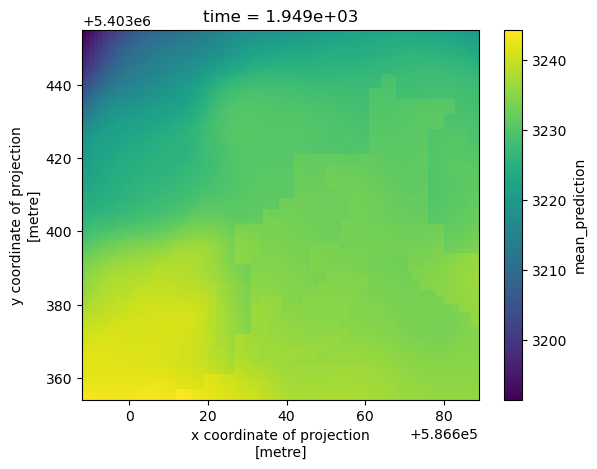

In [65]:
ds_result['mean_prediction'].isel(time=1).plot();